# This is trial for comparing evaluation result

1. Correlation map difference with control experiment
2. RMSE map difference with control experimnet
3. AUC map difference with control experiment
4. ROC curve of AUC_mean of all experiments
5. TF_bar of all experiments
6. bimodal_bar of all experiments

## [experiment] world_5x5_continuous

### MJJASO, JJA, JAS, ASO

- control (msot)
- soil moisture
- snow coverage
- sea surface temperature
- temperature of soil layer
- SST + MOISTURE
- SST + SNOW
- SST + SOIL TEMPERATURE

## [experiment] thailand_1x1_continuous

### MJJASO, JJA, JAS, ASO

- control (msot)
- soil moisture
- snow coverage
- sea surface temperature
- temperature of soil layer
- SST + MOISTURE
- SST + SNOW
- SST + SOIL TEMPERATURE

In [82]:
import numpy as np
import pickle
from scipy import stats
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [83]:
# world_5x5_continuous MJJASO

result_msot_MJJASO = f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                     f"/predictors_coarse_std_Apr_msot-pr_5x5_coarse_std_MJJASO_world" \
                     f"/epoch100_batch256_seed1.npy"
val_msot_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
                  f"/predictors_coarse_std_Apr_msot-pr_5x5_coarse_std_MJJASO_world.pickle"

result_m_MJJASO = f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                  f"/predictors_coarse_std_Apr_m-pr_5x5_coarse_std_MJJASO_world" \
                  f"/epoch100_batch256_seed1.npy"
val_m_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
                  f"/predictors_coarse_std_Apr_m-pr_5x5_coarse_std_MJJASO_world.pickle"

result_s_MJJASO = f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                  f"/predictors_coarse_std_Apr_s-pr_5x5_coarse_std_MJJASO_world" \
                  f"/epoch100_batch256_seed1.npy"
val_s_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
               f"/predictors_coarse_std_Apr_s-pr_5x5_coarse_std_MJJASO_world.pickle"

result_o_MJJASO = f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                  f"/predictors_coarse_std_Apr_o-pr_5x5_coarse_std_MJJASO_world" \
                  f"/epoch100_batch256_seed1.npy"
val_o_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
               f"/predictors_coarse_std_Apr_o-pr_5x5_coarse_std_MJJASO_world.pickle"

result_t_MJJASO =    f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                     f"/predictors_coarse_std_Apr_t-pr_5x5_coarse_std_MJJASO_world" \
                     f"/epoch100_batch256_seed1.npy"
val_t_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
               f"/predictors_coarse_std_Apr_t-pr_5x5_coarse_std_MJJASO_world.pickle"

result_mo_MJJASO =   f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
              f"/predictors_coarse_std_Apr_mo-pr_5x5_coarse_std_MJJASO_world" \
              f"/epoch100_batch256_seed1.npy"
val_mo_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
                f"/predictors_coarse_std_Apr_mo-pr_5x5_coarse_std_MJJASO_world.pickle"

result_so_MJJASO =  f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                    f"/predictors_coarse_std_Apr_so-pr_5x5_coarse_std_MJJASO_world" \
                    f"/epoch100_batch256_seed1.npy"
val_so_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
                f"/predictors_coarse_std_Apr_so-pr_5x5_coarse_std_MJJASO_world.pickle"

result_ot_MJJASO = f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                   f"/predictors_coarse_std_Apr_ot-pr_5x5_coarse_std_MJJASO_world" \
                   f"/epoch100_batch256_seed1.npy"
val_ot_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
                f"/predictors_coarse_std_Apr_ot-pr_5x5_coarse_std_MJJASO_world.pickle" 

In [84]:
# loading validation input and predicted result
def load_pred(path, result_path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    x_val, y_val = data['x_val'], data['y_val']
    pred_arr = np.squeeze(np.load(result_path))
    return x_val, y_val, pred_arr

def GMM(data):
    gmm = GaussianMixture(n_components=2, random_state=42)
    gmm.fit(data.reshape(-1, 1)) # 次元数2を入力とするため変形
    estimated_group = gmm.predict(data.reshape(-1, 1))
    return gmm

# true_false_bar
def true_false_bar(pred, y, criteria=0):
    true_count, false_count = 0, 0
    rmse_flat = []
    for sam in range(len(y)):
        value = pred[:, sam] # pred(1728, 1000)
        label = y[sam, :] # y(1000, 1728)
        rmse = np.sqrt(np.mean((value - label)**2))
        rmse_flat.append(rmse)
        
    rmse_flat = np.array(rmse_flat)
    gmm = GMM(rmse_flat)
    criteria = np.mean([gmm.means_[0, -1],
                        gmm.means_[1, -1]])
    for sam in range(len(y)):
        if rmse_flat[sam] <= criteria:
            true_count += 1
        else:
            false_count += 1
        
    print(f"criteria(mean of gmm) is {criteria}")
    print(f"tureu: over_criteria_count {true_count}, false: under_criteria_count {false_count}")
    return true_count, false_count

In [114]:
def draw_true_false_bar(true_count_array, false_count_array, name_list, color_list):
    fig, ax = plt.subplots(figsize=(6, 4))
    
    for i in range(len(name_list)):
        ax.bar(i+1,
               true_count_array[i],
               width=0.5,
               color=color_list[i],
               align='center',
               label=f"True({true_count_array[i]})")
        ax.bar(i+1,
               false_count_array[i],
               width=0.5,
               bottom=true_count_array[i],
               color=color_list[i],
               alpha=0.2,
               align='center',
               label=f"False({false_count_array[i]})")
    ax.set_xticks(np.arange(1,len(name_list)+1), name_list)
    ax.set_xlim(0, len(name_list)+1)
    ax.set_ylim(0, 1000)
    plt.xlabel("experiment name")
    plt.ylabel("true-false count")
    plt.title("cnn_continuous_pr_1x1")
    plt.legend()
    plt.show()

experiment result of msot
criteria(mean of gmm) is 0.29907237737696823
tureu: over_criteria_count 851, false: under_criteria_count 149
experiment result of m
criteria(mean of gmm) is 0.35814252553183035
tureu: over_criteria_count 851, false: under_criteria_count 149
experiment result of s
criteria(mean of gmm) is 0.39334266733047113
tureu: over_criteria_count 837, false: under_criteria_count 163
experiment result of o
criteria(mean of gmm) is 0.3226118496893448
tureu: over_criteria_count 851, false: under_criteria_count 149
experiment result of t
criteria(mean of gmm) is 0.36750772002020216
tureu: over_criteria_count 851, false: under_criteria_count 149


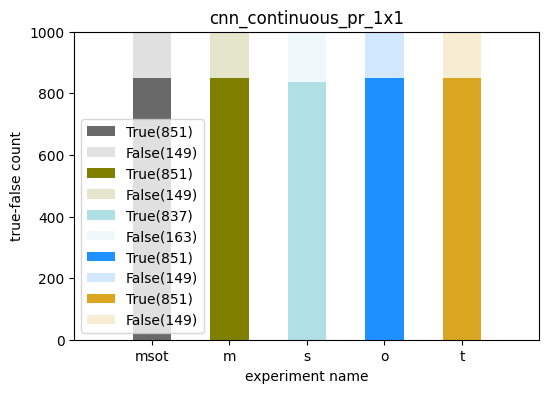

In [115]:
input_path_list = [val_msot_MJJASO,
                   val_m_MJJASO,
                   val_s_MJJASO,
                   val_o_MJJASO,
                   val_t_MJJASO]
result_path_list = [result_msot_MJJASO,
                    result_m_MJJASO,
                    result_s_MJJASO,
                    result_o_MJJASO,
                    result_t_MJJASO]
name_list = ['msot', 'm', 's', 'o', 't']
color_list = ['dimgrey', 'olive', 'powderblue', 'dodgerblue', 'goldenrod']

true_count_list = []
false_count_list = []

for inp, res, name in zip(input_path_list, result_path_list, name_list):
    print(f"experiment result of {name}")
    x_val, y_val, pred = load_pred(inp, res)
    true_count, false_count= true_false_bar(pred, y_val)
    true_count_list.append(true_count)
    false_count_list.append(false_count)
    
true_count_array = np.array(true_count_list)
false_count_array = np.array(false_count_list)
    
# draw comparison graphs
draw_true_false_bar(true_count_array, false_count_array, name_list, color_list)